In [99]:
import numpy as np
import random

angle = [random.uniform(0,2*np.pi)]
rand_vec = [np.random.randint(0,2) for i in range(4)]
rand = str(rand_vec[0])+str(rand_vec[1])+str(rand_vec[2])+str(rand_vec[3])
print(rand_vec, angle)

[1, 1, 1, 1] [5.2890008710729255]


In [106]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit import Aer, execute
from qiskit.aqua.components.optimizers import AQGD

optimum_parameters = []
epsilons = []
L = 10

def obj_fn(params):
    result = execute(qc,simulator,shots=1024,parameter_binds = [{theta: params[0]}]).result()
    counts = result.get_counts()
    s = 0
    for key,value in counts.items():
        counts[key] = value/1024
        if key == rand:
            s = s + pow(1 - counts[key], 2)
        else:
            s = s + pow(counts[key],2)
    return s

for l in range(L):
    theta = Parameter('θ')
    qc = QuantumCircuit(4,4)

    for i in range(l+1):
        qc.rx(theta, range(4))
        qc.barrier()

        qc.rz(theta, range(4))
        qc.cz(0,1)
        qc.cz(0,2)
        qc.cz(0,3)
        qc.cz(1,2)
        qc.cz(1,3)
        qc.cz(2,3)
        qc.barrier()

    qc.measure([0,1,2,3],[0,1,2,3])
    #qc.draw('mpl')    
    simulator = Aer.get_backend('qasm_simulator')
    
    a = AQGD()
    optimum_parameter, epsilon, it = AQGD.optimize(a,num_vars = 1,objective_function = obj_fn,initial_point=angle)
    
    optimum_parameters.append(optimum_parameter)
    epsilons.append(epsilon)


In [107]:
epsilons

[0.0,
 0.124267578125,
 0.0,
 0.0498046875,
 0.0,
 0.19241714477539062,
 0.0,
 0.16997718811035156,
 0.0,
 0.155853271484375]

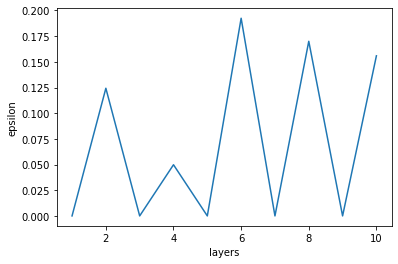

In [108]:
import matplotlib.pyplot as plt

layers = [i+1 for i in range(10)]
plt.plot(layers,epsilons)
plt.xlabel('layers')
plt.ylabel('epsilon')
#plt.savefig('rand_1111ryrz')

<Figure size 432x288 with 0 Axes>